# Problem 2.5 - Statistical Mechanics of Learning by A. Engel and C. Van den Broeck

This code was written in order to solve the problem 2.5 of the book [Statistical Mechanics of Learning](http://www.cambridge.org/catalogue/catalogue.asp?isbn=0511034571) by A. Engel and C. Van den Broeck.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math
np.random.seed(123)

In [2]:
m = 1000
n_list = [5, 10, 15, 20, 25, 30, 35, 40, 45, 50]

In [3]:
fig, ax = plt.subplots(len(n_list)//2 + 1, 2, figsize=(15,25))
ax = ax.ravel()
x_mp = []
x_typ = []
plt.suptitle("m=%i" % m, fontsize = 30)

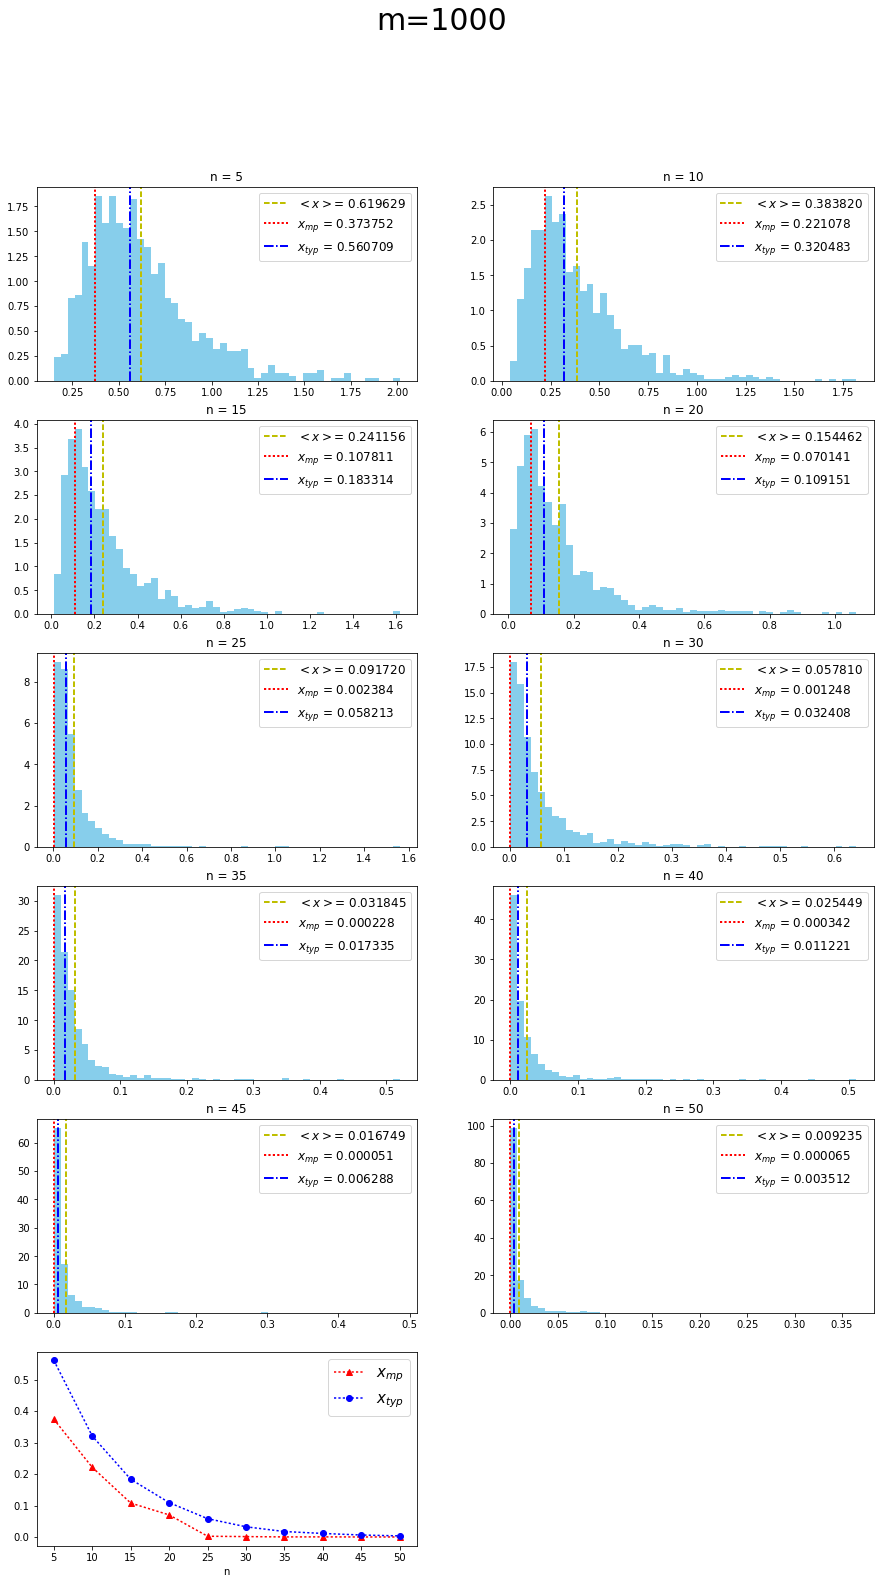

In [4]:
for i, n in zip(range(len(n_list)), n_list):
    m_array = []
    for j in range(m):
        
        # Product of n random numbers sorted uniformly between 1 and 2.
        rand_numb = np.random.uniform(1.0, 2.0, n)
        
        # Normalization of the product by exo(n/2)
        m_array.append(np.divide(np.prod(rand_numb),math.exp(n/2)) )   

    # Histogram    
    (nn, bins, patches) = ax[i].hist(m_array, bins=50, normed = True, 
                                     color ='skyblue')
  
    # <x>: np.mean(m_array)
    # -- Line to indentify this value in the histogram. 
    ax[i].axvline(np.mean(m_array), color='y',linestyle='--',linewidth=2, 
                  label="$<x>$= %f" % np.mean(m_array))
    
    # x_np: bins[np.argmax(nn)] 
    # -- Line to indentify this value in the histogram. 
    ax[i].axvline(bins[np.argmax(nn)], color='r', linestyle=':', 
                  linewidth=2, label="$x_{mp}$ = %f"%bins[np.argmax(nn)])

    # x_typ = math.exp(logx)
    # -- Line to indentify this value in the histogram. 
    logx = np.mean(np.log(m_array))
    math.exp(logx)
    ax[i].axvline(math.exp(logx), color='b', linestyle='-.', linewidth=2, 
                  label="$x_{typ}$ = %f" % math.exp(logx))
    
    # Histogram's title and legends
    ax[i].set_title("n = %d" % n)
    ax[i].legend(loc=0, prop={'size':12})
    
    # x_mp and x_typ arrays
    x_mp.append(bins[np.argmax(nn)])
    x_typ.append(math.exp(logx))
    
# Plot comparing the evolution of x_mp and x_typ with n
ax[i+1].plot(n_list, x_mp, color = 'r', marker='^', linestyle=':', 
             label ="$x_{mp}$")
ax[i+1].plot(n_list, x_typ, color = 'b', marker='o', linestyle=':', 
             label ="$x_{typ}$")
ax[i+1].legend(loc='upper right', prop={'size':15})
ax[i+1].set_xticks(n_list)
ax[i+1].set_xlabel('n')
ax[i+2].axis('off')

#plt.savefig('p4s-m=1000.pdf')

plt.show()
   